In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [11]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

homer us
shizilu cn
cape town za
rikitea pf
shitkino ru
murgab tm
lebu cl
ushuaia ar
mataura pf
sorong id
hasaki jp
nizhniy kuranakh ru
castro cl
ushuaia ar
vaini to
barentsburg sj
vaini to
ahipara nz
quatre cocos mu
cape town za
kidal ml
mar del plata ar
vaini to
georgetown sh
pamplona es
bonthe sl
rikitea pf
salalah om
skeldon gy
samusu ws
georgetown sh
vaitupu wf
kapaa us
albany au
tabiauea ki
dingle ie
port alfred za
hualmay pe
omsukchan ru
hamilton bm
atuona pf
cabo san lucas mx
nizhneyansk ru
rawalpindi pk
shubarkuduk kz
sao filipe cv
rawson ar
nouakchott mr
vaini to
haines junction ca
meulaboh id
esperance au
salinopolis br
hilo us
muisne ec
padang id
albany au
tuatapere nz
nuuk gl
taolanaro mg
tsihombe mg
ushuaia ar
east london za
ushuaia ar
tsihombe mg
mataura pf
puerto ayora ec
cidreira br
yellowknife ca
esso ru
tuktoyaktuk ca
codrington ag
goderich sl
yanam in
samarai pg
tahe cn
saint-georges gf
hobart au
ibadan ng
la serena cl
berlevag no
asau tv
rikitea pf
bluff nz
hilo us

east london za
tiksi ru
hobart au
huescar es
severo-yeniseyskiy ru
faanui pf
jalu ly
torun pl
loiza us
cape town za
gimbi et
port elizabeth za
simao cn
castro cl
molepolole bw
rikitea pf
ijaki ki
san policarpo ph
butaritari ki
codrington ag
rikitea pf
alotau pg
hobart au
sola vu
georgetown sh
castro cl
adrar dz
atar mr
atasu kz
arraial do cabo br
umzimvubu za
gamba ga
upernavik gl
illoqqortoormiut gl
arraial do cabo br
tabiauea ki
yellowknife ca
kaduna ng
punta arenas cl
punta arenas cl
hermanus za
saskylakh ru
salinas ec
vaini to
puerto ayora ec
vestmannaeyjar is
khatanga ru
mehamn no
antibes fr
mar del plata ar
elbistan tr
broome au
honiara sb
saskylakh ru
ballina au
iqaluit ca
severo-kurilsk ru
bredasdorp za
belushya guba ru
butaritari ki
surt ly
east london za
ayan ru
bone id
marsh harbour bs
magadan ru
pevek ru
igrim ru
ca mau vn
atuona pf
derzhavinsk kz
jurmala lv
puerto ayora ec
bauchi ng
taolanaro mg
mar del plata ar
nihommatsu jp
mataura pf
avarua ck
saint-philippe re
codringt

dingle ie
new norfolk au
kutum sd
vaini to
kieta pg
marawi sd
lebu cl
san patricio mx
victoria sc
hermanus za
sakakah sa
severo-kurilsk ru
sinkat sd
vaini to
saint john ca
palabuhanratu id
mandali iq
hermanus za
rikitea pf
rikitea pf
east london za
dikson ru
busselton au
thompson ca
pangody ru
castro cl
bandarbeyla so
togur ru
castro cl
kananga cd
new norfolk au
doctor pedro p. pena py
hithadhoo mv
kapaa us
illoqqortoormiut gl
icod de los vinos es
presidencia roque saenz pena ar
mar del plata ar
omsukchan ru


In [12]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [13]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | homer
Processing Record 2 of Set 1 | shizilu
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | shitkino
Processing Record 6 of Set 1 | murgab
Processing Record 7 of Set 1 | lebu
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | sorong
Processing Record 11 of Set 1 | hasaki
Processing Record 12 of Set 1 | nizhniy kuranakh
Processing Record 13 of Set 1 | castro
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 16 of Set 1 | ahipara
Processing Record 17 of Set 1 | quatre cocos
Processing Record 18 of Set 1 | kidal
Processing Record 19 of Set 1 | mar del plata
Processing Record 20 of Set 1 | georgetown
Processing Record 21 of Set 1 | pamplona
Processing Record 22 of Set 1 | bonthe
Processing Record 23 of 

Processing Record 37 of Set 4 | suez
Processing Record 38 of Set 4 | avallon
Processing Record 39 of Set 4 | saint george
Processing Record 40 of Set 4 | khonuu
City not found. Skipping...
Processing Record 41 of Set 4 | pevek
Processing Record 42 of Set 4 | bilibino
Processing Record 43 of Set 4 | qianan
Processing Record 44 of Set 4 | caravelas
Processing Record 45 of Set 4 | puro
Processing Record 46 of Set 4 | linjiang
Processing Record 47 of Set 4 | ponta do sol
Processing Record 48 of Set 4 | ilebo
Processing Record 49 of Set 4 | souillac
Processing Record 50 of Set 4 | avarua
Processing Record 1 of Set 5 | banda aceh
Processing Record 2 of Set 5 | geraldton
Processing Record 3 of Set 5 | biak
Processing Record 4 of Set 5 | maragogi
Processing Record 5 of Set 5 | bambous virieux
Processing Record 6 of Set 5 | campos altos
Processing Record 7 of Set 5 | cockburn town
Processing Record 8 of Set 5 | kenai
Processing Record 9 of Set 5 | belaya gora
Processing Record 10 of Set 5 | asa

City not found. Skipping...
Processing Record 27 of Set 8 | adrar
Processing Record 28 of Set 8 | atar
Processing Record 29 of Set 8 | atasu
Processing Record 30 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 31 of Set 8 | gamba
Processing Record 32 of Set 8 | kaduna
Processing Record 33 of Set 8 | salinas
Processing Record 34 of Set 8 | mehamn
Processing Record 35 of Set 8 | antibes
Processing Record 36 of Set 8 | elbistan
Processing Record 37 of Set 8 | honiara
Processing Record 38 of Set 8 | ballina
Processing Record 39 of Set 8 | iqaluit
Processing Record 40 of Set 8 | surt
Processing Record 41 of Set 8 | ayan
Processing Record 42 of Set 8 | bone
Processing Record 43 of Set 8 | marsh harbour
Processing Record 44 of Set 8 | magadan
Processing Record 45 of Set 8 | igrim
Processing Record 46 of Set 8 | ca mau
Processing Record 47 of Set 8 | derzhavinsk
Processing Record 48 of Set 8 | jurmala
Processing Record 49 of Set 8 | bauchi
Processing Record 50 of Set 8 | nih

Processing Record 13 of Set 12 | senneterre
Processing Record 14 of Set 12 | rundu
Processing Record 15 of Set 12 | dinhata
Processing Record 16 of Set 12 | chuncheng
Processing Record 17 of Set 12 | tadine
Processing Record 18 of Set 12 | orange
Processing Record 19 of Set 12 | deputatskiy
Processing Record 20 of Set 12 | panguna
Processing Record 21 of Set 12 | hatsukaichi
Processing Record 22 of Set 12 | andenes
Processing Record 23 of Set 12 | praia da vitoria
Processing Record 24 of Set 12 | saurimo
Processing Record 25 of Set 12 | namibe
Processing Record 26 of Set 12 | doha
Processing Record 27 of Set 12 | yarensk
Processing Record 28 of Set 12 | rio grande
Processing Record 29 of Set 12 | iskateley
Processing Record 30 of Set 12 | nuevitas
Processing Record 31 of Set 12 | majene
Processing Record 32 of Set 12 | honningsvag
Processing Record 33 of Set 12 | grinnell
Processing Record 34 of Set 12 | kloulklubed
Processing Record 35 of Set 12 | peruibe
Processing Record 36 of Set 1

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Homer,59.6425,-151.5483,44.80,95,90,0.00,US,2021-06-03 14:24:28
1,Shizilu,35.1711,118.8289,63.43,44,100,1.81,CN,2021-06-03 14:24:28
2,Cape Town,-33.9258,18.4232,72.10,56,0,1.01,ZA,2021-06-03 14:22:28
3,Rikitea,-23.1203,-134.9692,72.41,63,100,11.92,PF,2021-06-03 14:24:28
4,Shitkino,56.3703,98.3543,66.72,40,95,3.02,RU,2021-06-03 14:24:29
5,Murgab,37.4966,61.9714,107.47,13,0,6.73,TM,2021-06-03 14:24:29
6,Lebu,-37.6167,-73.6500,56.82,97,100,9.55,CL,2021-06-03 14:24:30
7,Ushuaia,-54.8000,-68.3000,28.06,80,0,3.44,AR,2021-06-03 14:24:30
8,Mataura,-46.1927,168.8643,49.48,93,97,3.11,NZ,2021-06-03 14:24:30
9,Sorong,-0.8833,131.2500,78.37,88,100,5.86,ID,2021-06-03 14:24:31


In [15]:
print(len(city_data))

565


In [54]:
# Create the output file (CSV).
output_data_file = "weather_data1"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

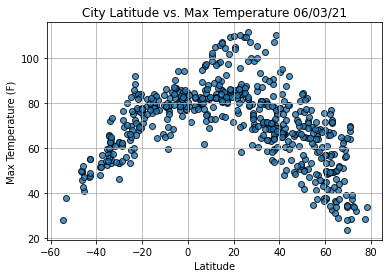

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

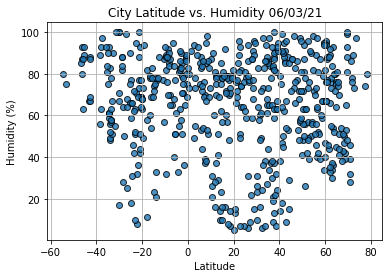

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

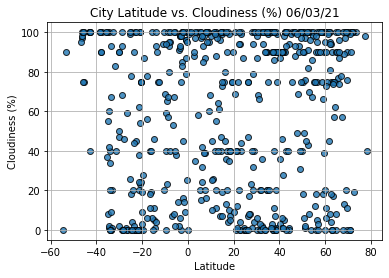

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

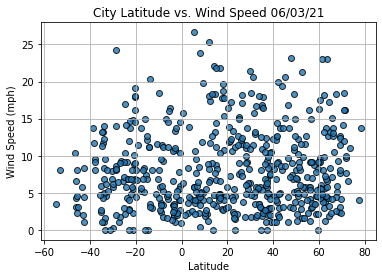

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]
index13

City                        Vaini
Lat                         -21.2
Lng                        -175.2
Max Temp                    69.96
Humidity                       88
Cloudiness                     20
Wind Speed                    0.0
Country                        TO
Date          2021-06-03 14:24:32
Name: 13, dtype: object

In [23]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3      False
4       True
       ...  
560     True
561     True
562    False
563     True
564    False
Name: Lat, Length: 565, dtype: bool

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Homer,59.6425,-151.5483,44.80,95,90,0.00,US,2021-06-03 14:24:28
1,Shizilu,35.1711,118.8289,63.43,44,100,1.81,CN,2021-06-03 14:24:28
4,Shitkino,56.3703,98.3543,66.72,40,95,3.02,RU,2021-06-03 14:24:29
5,Murgab,37.4966,61.9714,107.47,13,0,6.73,TM,2021-06-03 14:24:29
10,Hasaki,35.7333,140.8333,68.40,84,100,17.90,JP,2021-06-03 14:24:31


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

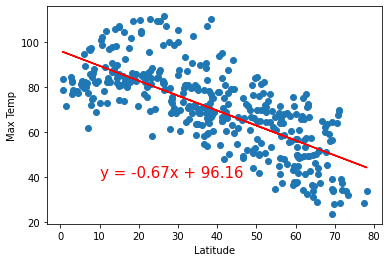

LinregressResult(slope=-0.6651264823860754, intercept=96.16332114264327, rvalue=-0.7268748821940311, pvalue=1.7632250883445987e-64, stderr=0.0321111935531788, intercept_stderr=1.3854075935562633)

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))
Stats = linregress(x_values, y_values)
Stats

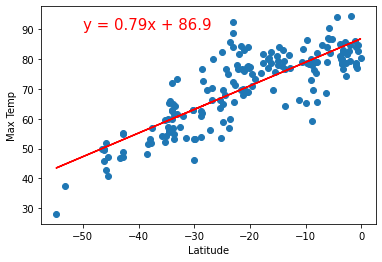

LinregressResult(slope=0.7924461079190817, intercept=86.90362957223049, rvalue=0.8246763581347212, pvalue=6.398115461215226e-46, stderr=0.04073702929930967, intercept_stderr=1.0032498017046394)

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))
Stats = linregress(x_values, y_values)
Stats

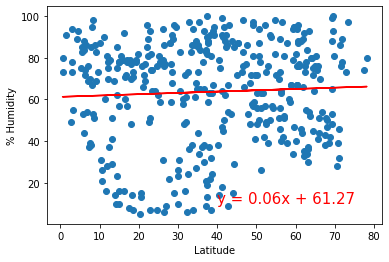

LinregressResult(slope=0.06301976057331017, intercept=61.272729223699805, rvalue=0.051322412340199776, pvalue=0.3151829290000075, stderr=0.06266103759227631, intercept_stderr=2.7034522138421218)

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))
Stats = linregress(x_values, y_values)
Stats

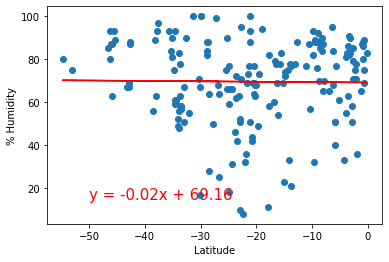

LinregressResult(slope=-0.01868271656339758, intercept=69.1622829284926, rvalue=-0.012508249787276878, pvalue=0.8676429542177145, stderr=0.11194365994173619, intercept_stderr=2.756888672796315)

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))
Stats = linregress(x_values, y_values)
Stats

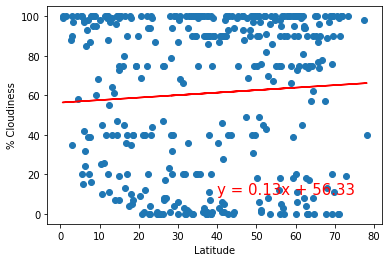

LinregressResult(slope=0.12588961791521852, intercept=56.325217938909475, rvalue=0.06418787653504822, pvalue=0.20887748872306452, stderr=0.10000944265093402, intercept_stderr=4.314814429008283)

In [45]:
#Skill Drill
# Linear regression on the Northern Hemisphere for %Cloudiness

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

Stats = linregress(x_values, y_values)
Stats

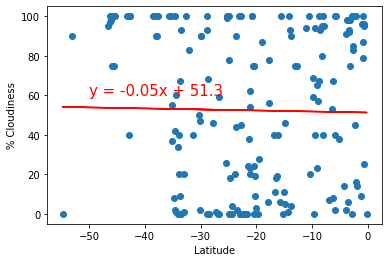

LinregressResult(slope=-0.05149774377221719, intercept=51.30350427979409, rvalue=-0.017331089338005097, pvalue=0.8173781988605725, stderr=0.22268302197307505, intercept_stderr=5.484118539818594)

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))
Stats = linregress(x_values, y_values)
Stats

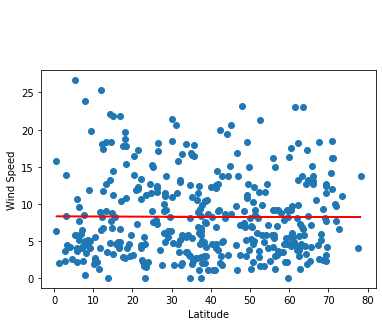

LinregressResult(slope=-0.0011057186379399293, intercept=8.29018776821586, rvalue=-0.004020114593904123, pvalue=0.9373315593718863, stderr=0.014054108460545242, intercept_stderr=0.6063514440737827)

In [49]:
# Linear regression on the Northern Hemisphere Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for Wind Speed', 'Wind Speed',(40,35))
Stats = linregress(x_values, y_values)
Stats

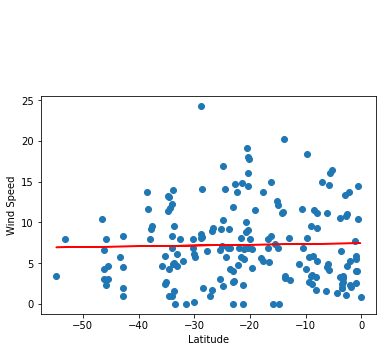

LinregressResult(slope=0.009367852104712944, intercept=7.453297243371422, rvalue=0.02601856866168534, pvalue=0.728814817331846, stderr=0.0269773677424174, intercept_stderr=0.6643842053193614)

In [52]:
# Linear regression on the Southern Hemisphere Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        n for Wind Speed', 'Wind Speed',(-50,35))
Stats = linregress(x_values, y_values)
Stats